# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Rifqi Adli Gumay
- **Email:** m010d4ky3215@bangkit.academy

- **ID Dicoding:** rifqiadli

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apakah kondisi cuaca mempengaruhi jumlah sepeda yang disewa?

- Pertanyaan 2 : Bagaimana pola penyewaan sepeda berubah menurut hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
link = lambda x : f"https://raw.githubusercontent.com/myudak/Bike-Exploratory-Data-Analysis/main/data/{x}.csv"

In [5]:
day_data = pd.read_csv(link("day"))
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_data = pd.read_csv(link("hour"))
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [7]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
print("Jumlah duplikasi day data: ", day_data.duplicated().sum())

Jumlah duplikasi day data:  0


In [10]:
print("Jumlah duplikasi hour data: ", hour_data.duplicated().sum())

Jumlah duplikasi hour data:  0


### Cleaning Data

data sudah cukup bersih untuk analisis selanjutnya

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
day_data.describe()
hour_data['hr'].value_counts()


17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64

<ipython-input-15-6c24bd503ded>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hour_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


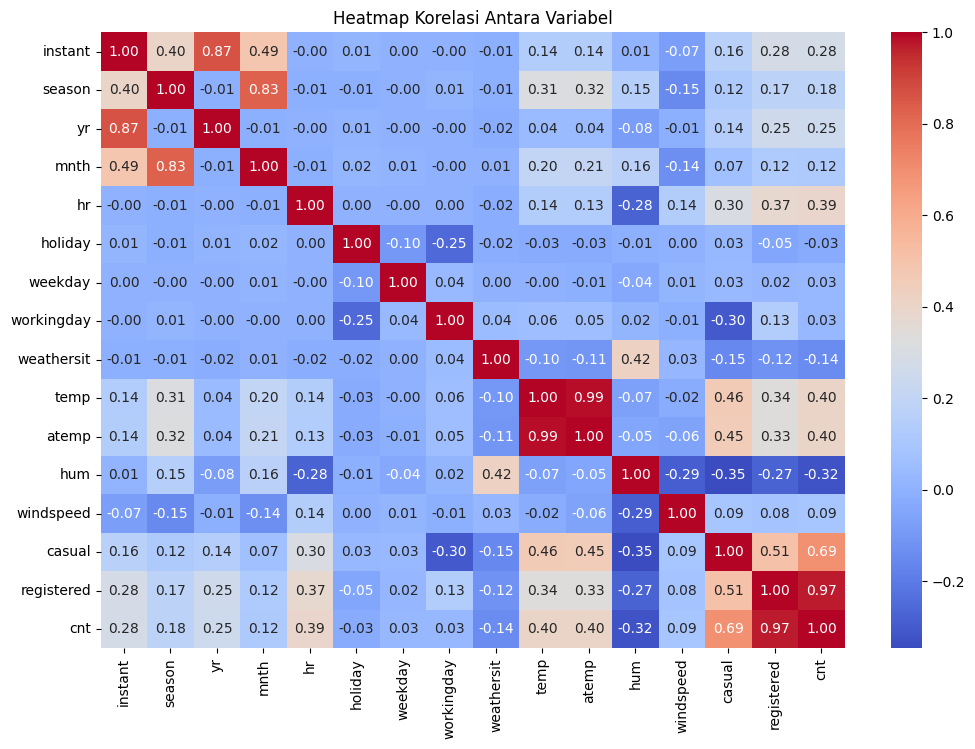

In [15]:
### Explore korelasi antara variabel

plt.figure(figsize=(12, 8))
sns.heatmap(hour_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antara Variabel')
plt.show()




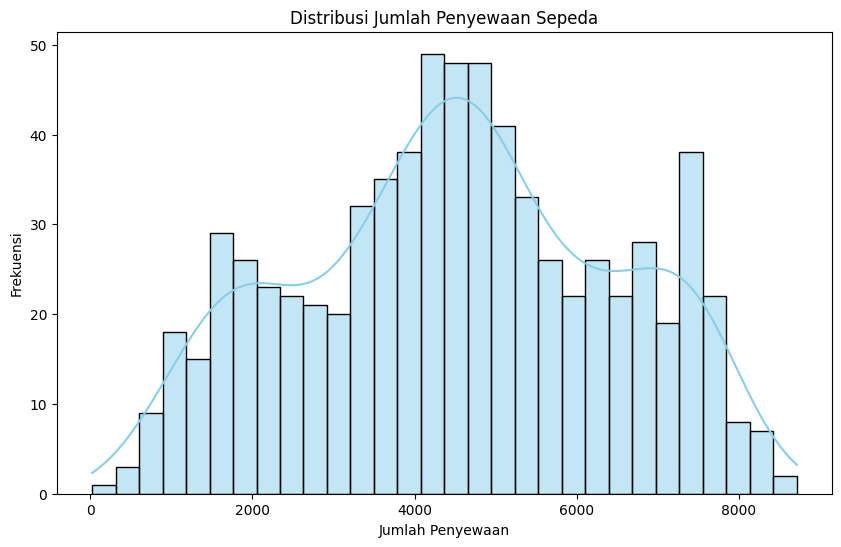

In [16]:
### Distribusi variabel target

plt.figure(figsize=(10, 6))
sns.histplot(day_data['cnt'], kde=True, bins=30, color='skyblue')
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()


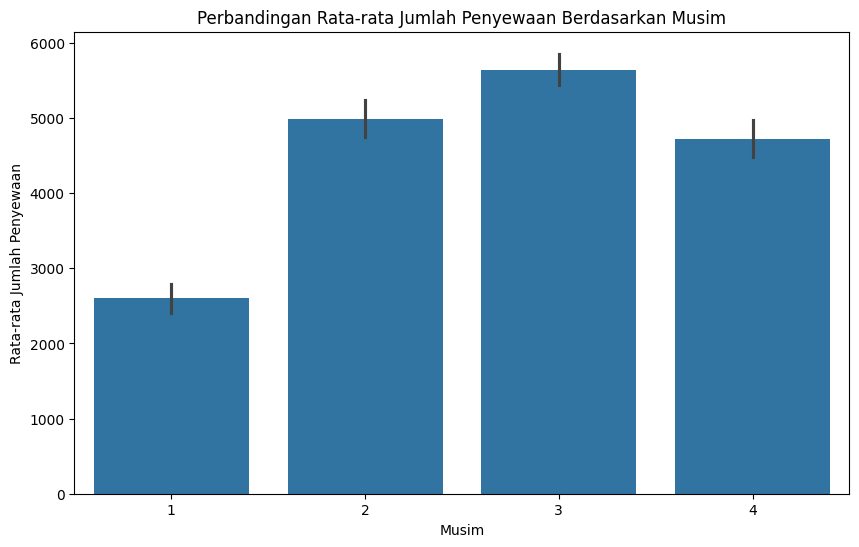

In [17]:
### Perbandingan rata-rata jumlah penyewaan berdasarkan musim

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=day_data, estimator=np.mean)
plt.title('Perbandingan Rata-rata Jumlah Penyewaan Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

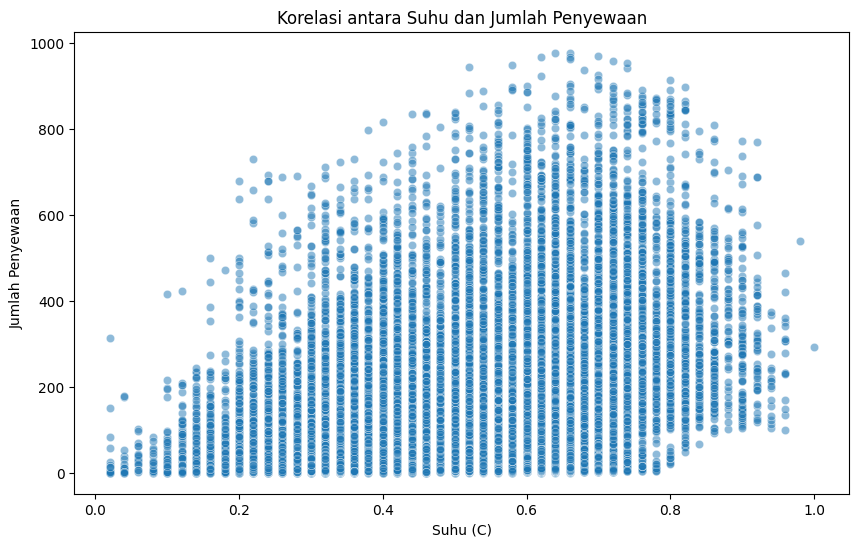

In [18]:
### Korelasi antara suhu dan jumlah penyewaan

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_data, alpha=0.5)
plt.title('Korelasi antara Suhu dan Jumlah Penyewaan')
plt.xlabel('Suhu (C)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah kondisi cuaca mempengaruhi jumlah sepeda yang disewa?

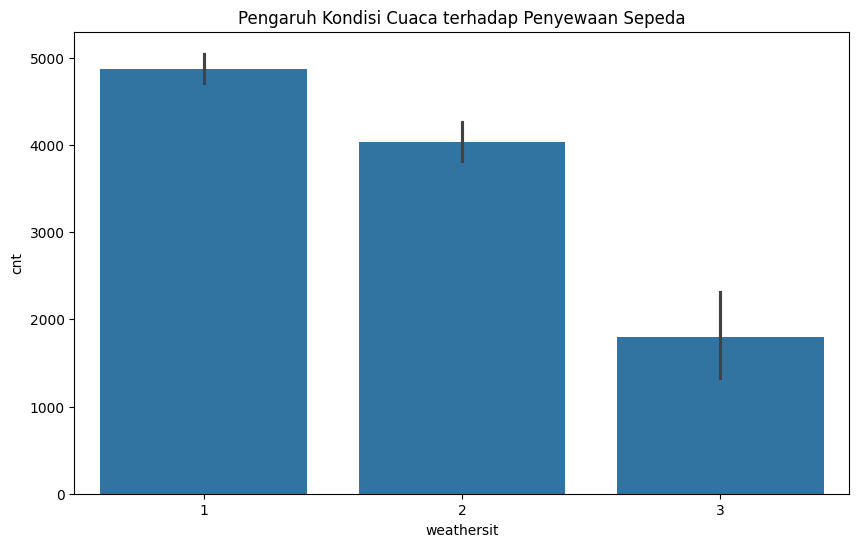

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=day_data)
plt.title('Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda')
plt.show()


### Pertanyaan 2: Bagaimana pattern penyewaan sepeda berubah menurut hari dalam seminggu?

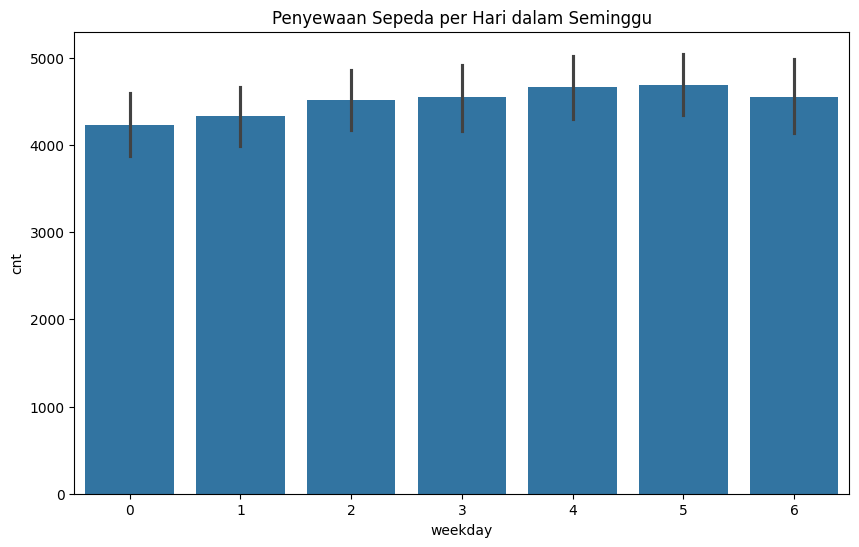

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=day_data)
plt.title('Penyewaan Sepeda per Hari dalam Seminggu')
plt.show()


## Conclusion

- Conclution pertanyaan 1 : Kondisi cuaca memiliki pengaruh signifikan terhadap jumlah sepeda yang disewa. Cuaca yang lebih cerah cenderung menghasilkan jumlah penyewaan yang lebih tinggi. Hal ini dapat menjadi informasi yang berharga bagi penyedia layanan sepeda untuk mengoptimalkan operasi mereka, seperti menyiapkan lebih banyak sepeda pada hari-hari dengan cuaca cerah.
- Conclution pertanyaan  : Ada perbedaan pola penyewaan sepeda selama hari dalam seminggu, dengan akhir pekan menunjukkan peningkatan penyewaan dibandingkan hari kerja.Informasi ini dapat membantu dalam perencanaan stok dan pelayanan lebih lanjut, seperti menyesuaikan jadwal pemeliharaan atau memperluas layanan pengiriman selama hari-hari dengan tingkat permintaan yang tinggi.

Dengan demikian, analisis ini memberikan wawasan yang berharga tentang faktor-faktor yang mempengaruhi jumlah penyewaan sepeda dan pola penggunaan, yang dapat digunakan untuk pengambilan keputusan yang lebih baik dalam manajemen layanan sepeda.